<a href="https://colab.research.google.com/github/Lucas20santos/GoogleColab/blob/main/LugarGeometricoDasRaizes1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lugar Geometrico das Raizes

Esse projeto visa desenhar ou plotar os locais por onde os polo da função de transferência: 

${\Large H(s) = {k\over (s^2 + 10s + k)}}$

irão passar.

Para isso, foi usado as seguintes ferramentas:

A primeira célula desse programa importa as bibliotecas que serão importante para a criação de vetores e a plotangem do gráfico.
- numpy

  - Essa biblioteca será responsável por criar nossos vetores
  - np é um apelido(alias) dado a biblioteca numpy para encurtar o nome da biblioteca.

- matplotlib.pyplot
  - Essa biblioteca será usada para criar os gráficos
  - plt é o apelido dela

Também foi criado 4 lista, de forma global, para armazenar os valores das partes real e imaginárias dos polos p1 e p2.

Foi usado a função: 

$ {\Large np.arange(start, stop, step)},$
  
  - start: valor inicial, no nosso exemplo foi 0
  - stop: valor final, nesse exemplo 51
  - step: passo, nesse exemplo 1.

para criar os valores do parâmetro $K$ que varia de 0 até 50; mas, como o último número não é pego pela função, o parâmetro $K$ varia de 0 até 50.

## Funções

As funções deltaPositivo(), deltaIgualAZero() e deltaNegativo(); trabalha com o delta da função do segundo grau. A função inserirPontos() foi criado para inserir os valores dos polos em suas respectivas listas e por último foi criado a função tranformaListaEmVetor(), que o próprio nome deixa bem claro a função dela.

As duas últimas células, fazendo uma analogia, seria o nosso metodo principal que chama, quando preciso for, as outras funções. E por último são os métodos para plotar os gráficos.

In [99]:
import numpy as np
import matplotlib.pyplot as plt

K = np.arange(0, 51, 1)
parteRealP1 = []
parteImagP1 = []

parteRealP2 = []
parteImagP2 = []

In [100]:
def deltaPositivo(delta):
  p1 = (-10 + np.sqrt(delta)) / (2 * 1)
  p2 = (-10 - np.sqrt(delta)) / (2 * 1)
  i2 = 0
  i1 = 0
  return p1, p2, i1, i2

In [101]:
def deltaIgualAZero(delta):
  p1 = (-10 / (2 * 1))
  p2 = p1
  i1 = 0
  i2 = 0
  return p1, p2, i1, i2

In [102]:
def deltaNegativo(delta):
  p1 = (-10 / (2 * 1))
  p2 = (-10 / (2 * 1))
  i1 = (np.sqrt(-1 * delta)/ (2 * 1))
  i2 = - i1
  return p1, p2, i1, i2

In [103]:
def inserirPontos(p1, p2, i1, i2):

  parteRealP1.append(p1)
  parteRealP2.append(p2)
  parteImagP1.append(i1)
  parteImagP2.append(i2)

  return parteRealP1, parteImagP1, parteRealP2, parteImagP2

In [104]:
def tranformaListaEmVetor(listaRealP1, listaImgP1, listaRealP2, listaImgP2):
  realP1 = np.array(listaRealP1)
  imgP1  = np.array(listaImgP1)
  
  realP2 = np.array(listaRealP2)
  imgP2  = np.array(listaImgP2)

  return realP1, realP2, imgP1, imgP2 

In [105]:
for k in K:
  delta = 10 ** 2 - 4 * 1 * k
  if delta > 0:
    p1, p2, i1, i2 = deltaPositivo(delta)
  
  if delta == 0:
    p1, p2, i1, i2 = deltaIgualAZero(delta)

  if delta < 0:
    p1, p2, i1, i2 = deltaNegativo(delta)

  
  listaRealP1, listaImgP1, listaRealP2, listaImgP2 = inserirPontos(p1, p2, i1, i2)

Rp1, Rp2, Ip1, Ip2 = tranformaListaEmVetor(listaRealP1, listaImgP1, listaRealP2, listaImgP2)

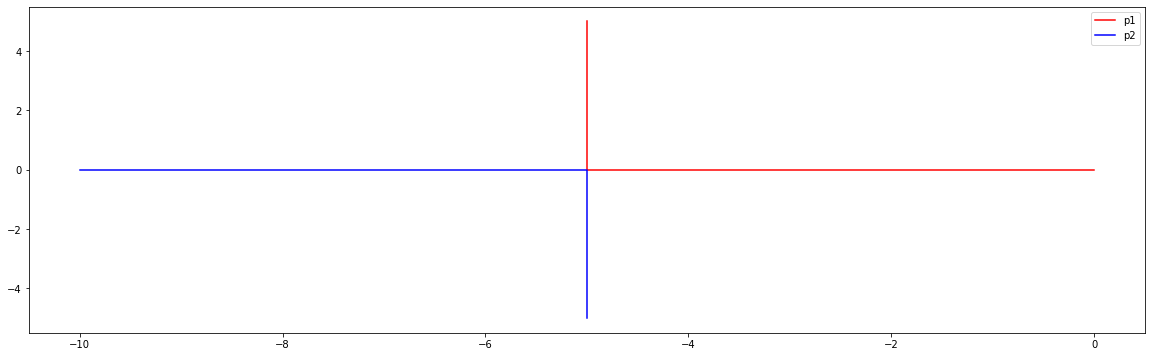

In [106]:
fig = plt.figure(figsize=(20, 6))


plt.plot(Rp1, Ip1, '-r')
plt.plot(Rp2, Ip2, '-b')
plt.legend(["p1", "p2"])
plt.show()

## Conclusão

A seta azul representa os valores do polo $p_2$ e por onde ele passa quando o valor de $k$ varia; e a reta em vermelho, representa os valores de $p_1$ variando da mesma forma que outro polo. 

O polo $p_2$ começa no valor -10, chega no valor -5 e desce; enquanto $p_1$, começa em 0 chega até -5 e sobe. 

Podemos concluir que o sistema de $H(s)$ é estável para todo o valor de $K$, exceto quando o valor de $K = 0$, aonde exite um polo encima do eixo $j\omega$, para esse caso o sistema é marginalmente estável.